In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Crregando os datasets


dados_partida = pd.read_csv("campeonato-brasileiro-full.csv")

estatisticas = pd.read_csv("campeonato-brasileiro-estatisticas-full.csv")

cartoes = pd.read_csv("campeonato-brasileiro-cartoes.csv")

gols = pd.read_csv("campeonato-brasileiro-gols.csv")

# Atividade 1

### Visualização e limpeza

#### Campeonato Brasileiro Full: dados_partida

In [3]:
dados_partida.head()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


In [4]:
# Quantidade de registros antes da limpeza
dados_partida.shape

(8785, 16)

In [5]:
# Contabilizando
dados_partida.isnull().sum()

ID                       0
rodata                   0
data                     0
hora                     0
mandante                 0
visitante                0
formacao_mandante     4975
formacao_visitante    4975
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_Placar          0
visitante_Placar         0
mandante_Estado          0
visitante_Estado         0
dtype: int64

In [6]:
# Cria uma função que substitui todos os tipos de valores que não são reconhecidos por isnull() no dataframe
# para que possamos fazer a limpeza completa em todos os dataframes

def padronizar_nulos(df):
    nulos = ['None', 'none', 'NaN', 'nan', '', ' ', 'N/A', 'n/a', 'null', 'NULL', '-'] # lista de valores considerados
    df_padronizado = df.replace(nulos, np.nan) # substitui em todas as colunas
    return df_padronizado

#### O objetivo em criar a função é transformar todo tipo de valor que causa erros mas que não são reconhecidos pelas funções de reconhecimento do pandas para um tipo que possamos reconhecê-los e tratá-los.

In [7]:
# chamando a função e padronizando todos os tipos de erro
dados_partida = padronizar_nulos(dados_partida)

In [8]:
# Contabilizando após padronização
dados_partida.isnull().sum()

ID                       0
rodata                   0
data                     0
hora                     0
mandante                 0
visitante                0
formacao_mandante     4975
formacao_visitante    4975
tecnico_mandante      4610
tecnico_visitante     4610
vencedor              2322
arena                    0
mandante_Placar          0
visitante_Placar         0
mandante_Estado          0
visitante_Estado         0
dtype: int64

In [9]:
# Removendo registros com valores inválidos
dados_partida = dados_partida.dropna()

In [10]:
# Quantidade de registros após limpeza
dados_partida.shape

(2784, 16)

In [11]:
# Visualizando
dados_partida.head(3)

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
4729,4741,13,03/08/2014,16:00,Chapecoense,Flamengo,4-4-2,4-2-3-1,C. Rodrigues,V. Luxemburgo da Silva,Chapecoense,Arena Condá,1,0,SC,RJ
4797,4808,20,10/09/2014,19:30,Palmeiras,Criciuma,4-2-2-2,4-2-3-1,D. Silvestre Júnior,G. Dal Pozzo,Palmeiras,Estádio Municipal Paulo Machado de Carvalho,1,0,SP,SC
4821,4833,22,17/09/2014,22:00,Coritiba,Sao Paulo,4-3-2-1,4-4-2,M. dos Santos Gonçalves,M. Ramalho,Coritiba,Couto Pereira,3,1,PR,SP


#### Campeonato Brasileiro Estatísticas:  estatisticas

In [12]:
# Visualizando o dataframe
estatisticas.head()

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0


In [13]:
# quatidade de registros antes da limpeza
estatisticas.shape

(17570, 13)

In [14]:
# Contabilizando
estatisticas.isnull().sum()

partida_id            0
rodata                0
clube                 0
chutes                0
chutes_no_alvo        0
posse_de_bola      9212
passes                0
precisao_passes    9212
faltas                0
cartao_amarelo        0
cartao_vermelho       0
impedimentos          0
escanteios            0
dtype: int64

In [15]:
# Padronizando
estatisticas = padronizar_nulos(estatisticas)

In [16]:
# Contabilizando
estatisticas.isnull().sum()

partida_id             0
rodata                 0
clube                  0
chutes                 0
chutes_no_alvo         0
posse_de_bola      10750
passes                 0
precisao_passes    13058
faltas                 0
cartao_amarelo         0
cartao_vermelho        0
impedimentos           0
escanteios             0
dtype: int64

In [17]:
# Removendo registros inválidos
estatisticas = estatisticas.dropna()

In [18]:
# Quantidade de registros após limpeza
estatisticas.shape

(4512, 13)

In [19]:
# Visualizando
estatisticas.head()

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
12250,6126,1,Gremio,6,2,60%,649,86%,15,1,1,3,4
12251,6126,1,Cruzeiro,12,2,40%,425,81%,20,3,0,0,7
12252,6127,1,Vitoria,21,6,66%,545,88%,24,3,0,2,4
12253,6127,1,Flamengo,10,5,34%,286,72%,10,2,1,2,5
12254,6128,1,Ceara,10,2,46%,472,85%,5,1,0,0,2


#### Campeonato Brasileiro Cartões: cartoes

In [20]:
# Visualizando
cartoes.head()

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto
0,4607,1,Figueirense,Amarelo,Paulo Roberto da Silva,28.0,NaN,66
1,4607,1,Figueirense,Amarelo,Thiago Heleno,4.0,Zagueiro,44
2,4608,1,Internacional,Amarelo,Andrés D'Alessandro,10.0,Meio-campo,72
3,4608,1,Vitoria,Amarelo,Marcelo Machado dos Santos,29.0,NaN,86
4,4608,1,Vitoria,Amarelo,Mansur,NaN,Zagueiro,10


In [21]:
# Quantidade de resgistros antes da limpeza
cartoes.shape

(20953, 8)

In [22]:
# Contabilizando registros inválidos antes da limpeza

cartoes.isnull().sum()

partida_id       0
rodata           0
clube            0
cartao           0
atleta           6
num_camisa     386
posicao       1198
minuto           0
dtype: int64

#### Iremos excluir a coluna 'num_camisa' por ser irrelevante. Essa coluna representa o número da camisa do jogador penalizado, o que não é útil nas análises. Portanto, excluir registros de partidas apenas por conta disso significa apenas perda de informação.

In [23]:
# Excluindo coluna num_camisa
cartoes = cartoes.drop(columns = ['num_camisa'])

In [24]:
# Padronizando registros inváidos

cartoes = padronizar_nulos(cartoes)

In [25]:
# Contabilizando aopós padronização
cartoes.isnull().sum()

partida_id       0
rodata           0
clube            0
cartao           0
atleta           6
posicao       1198
minuto           0
dtype: int64

In [26]:
# Removendo registros inválidos

cartoes = cartoes.dropna()

In [27]:
# Quantidade de registros após limpeza

cartoes.shape

(19749, 7)

#### Campeonato Brasileiro Gols: gols

In [28]:
# Visualizando
gols.head()

,partida_id,rodata,clube,atleta,minuto,tipo_de_gol
0,4607,1,Fluminense,Rafael Sóbis,31,NaN
1,4607,1,Fluminense,Nirley da Silva Fonseca,59,Gol Contra
2,4607,1,Fluminense,Fred,45,Penalty
3,4608,1,Internacional,Charles Aránguiz,6,NaN
4,4612,1,Cruzeiro,Nílton Ferreira Júnior,63,NaN


In [29]:
# Quantidade de registros
gols.shape

(9861, 6)

In [30]:
# Contabilizando antes da padronização
gols.isnull().sum()

partida_id        0
rodata            0
clube             0
atleta            0
minuto            0
tipo_de_gol    8678
dtype: int64

In [31]:
gols['tipo_de_gol'].unique()

array([nan, 'Gol Contra', 'Penalty'], dtype=object)

In [32]:
# Verificando o percentual representativo 

(8678*100)/9861

88.00324510698712

#### A coluna 'tipo_de_gol' possui apenas dois tipos de valores válidos: Gol Contra e Penalty. É muito improvável que no campeonato brasileiro, nas edições consideradas nas bases de dados, tenha ocorrido somente esses dois tipos de gols. 

#### Adicionalmente, valores inválidos nesta coluna representam 88,00% do total, logo, excluir registros de partidas por conta de uma coluna da qual nada se pode inferir sobre ela significa apenas perda de informação relevante. Portanto, iremos excluir a coluna 'tipo_de_gol'

In [33]:
# Excluindo a coluna tipo_de_gol

gols = gols.drop(columns = ['tipo_de_gol'])

In [34]:
# Padronizando registros invalidos 
gols = padronizar_nulos(gols)

In [35]:
# Contabiliozando após padronização
gols.isnull().sum()

partida_id    0
rodata        0
clube         0
atleta        0
minuto        0
dtype: int64

In [36]:
# Removendo registros inválidos

gols = gols.dropna()

In [37]:
# Quantidade de registros após limpeza

gols.shape

(9861, 5)

In [38]:
# Correção de texto

dados_partida.rename(columns={'rodata' : 'rodada', 'ID' : 'partida_id'}, inplace = True)
estatisticas.rename(columns={'rodata' : 'rodada'}, inplace = True)
cartoes.rename(columns={'rodata' : 'rodada'}, inplace = True)
gols.rename(columns={'rodata' : 'rodada'}, inplace = True)

## Filtrando os DataFrame's por id's de partidas em comum, mantendo apenas as partidas comuns a todos.

In [39]:
# Obtendo os ids comuns nos dataframe's

ids_comuns = set(dados_partida['partida_id']) & set(estatisticas['partida_id']) & set(cartoes['partida_id']) & set(gols['partida_id'])

In [40]:
# Filtrando os datafram's com a intersecção dos id's comuns das partidas

dados_partida_filtrado = dados_partida[dados_partida['partida_id'].isin(ids_comuns)]
estatisticas_filtrado = estatisticas[estatisticas['partida_id'].isin(ids_comuns)]
cartoes_filtrado = cartoes[cartoes['partida_id'].isin(ids_comuns)]
gols_filtrado = gols[gols['partida_id'].isin(ids_comuns)]

# Atividadade 2

In [41]:
# Criando a tabela com esttisticas do mandante

estat_mandante = estatisticas_filtrado.rename(columns={'clube': 'mandante'})
estat_mandante = estat_mandante.add_prefix('mandante_')
estat_mandante = estat_mandante.rename(columns={'mandante_partida_id': 'partida_id', 'mandante_mandante': 'mandante'})

In [42]:
# Criando a tabela com estatisticas do visitante

estat_visitante = estatisticas_filtrado.rename(columns={'clube': 'visitante'})
estat_visitante = estat_visitante.add_prefix('visitante_')
estat_visitante = estat_visitante.rename(columns={'visitante_partida_id': 'partida_id', 'visitante_visitante': 'visitante'})

In [43]:
# Join com estatísticas do mandante
dados_com_mandante = pd.merge(
    dados_partida_filtrado,
    estat_mandante,
    on=['partida_id', 'mandante'],
    how='inner'
)

# Join com estatísticas do visitante
dados_completo = pd.merge(
    dados_com_mandante,
    estat_visitante,
    on=['partida_id', 'visitante'],
    how='inner'
)

In [44]:
# Visualizando
dados_completo.head()

,partida_id,rodada,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,...,visitante_chutes,visitante_chutes_no_alvo,visitante_posse_de_bola,visitante_passes,visitante_precisao_passes,visitante_faltas,visitante_cartao_amarelo,visitante_cartao_vermelho,visitante_impedimentos,visitante_escanteios
0,6126,1,14/04/2018,16:00,Cruzeiro,Gremio,4-2-3-1,4-2-3-1,L. Venker de Menezes,Renato Gaúcho,...,6,2,60%,649,86%,15,1,1,3,4
1,6128,1,14/04/2018,21:03,Santos,Ceara,4-3-3,4-1-4-1,J. Ribeiro Ventura,M. Oliveira Chamusca,...,10,2,46%,472,85%,5,1,0,0,2
2,6129,1,15/04/2018,11:00,America-MG,Sport,4-1-4-1,4-3-2-1,E. Alves Moreira,N. Baptista Júnior,...,15,5,62%,580,85%,12,3,0,3,6
3,6130,1,15/04/2018,16:01,Vasco,Atletico-MG,4-1-4-1,4-1-4-1,J. Mannarino,T. Mendes Larghi,...,11,6,33%,321,78%,18,3,0,3,3
4,6131,1,15/04/2018,16:02,Internacional,Bahia,4-2-3-1,4-2-3-1,O. Hellmann,A. Ferreira,...,12,2,55%,491,82%,18,0,0,1,3


In [45]:
dados_completo.shape

(1600, 38)

# Atividade 3

## A posse de bola influência no resultado?

In [46]:
dados_completo.head()

,partida_id,rodada,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,...,visitante_chutes,visitante_chutes_no_alvo,visitante_posse_de_bola,visitante_passes,visitante_precisao_passes,visitante_faltas,visitante_cartao_amarelo,visitante_cartao_vermelho,visitante_impedimentos,visitante_escanteios
0,6126,1,14/04/2018,16:00,Cruzeiro,Gremio,4-2-3-1,4-2-3-1,L. Venker de Menezes,Renato Gaúcho,...,6,2,60%,649,86%,15,1,1,3,4
1,6128,1,14/04/2018,21:03,Santos,Ceara,4-3-3,4-1-4-1,J. Ribeiro Ventura,M. Oliveira Chamusca,...,10,2,46%,472,85%,5,1,0,0,2
2,6129,1,15/04/2018,11:00,America-MG,Sport,4-1-4-1,4-3-2-1,E. Alves Moreira,N. Baptista Júnior,...,15,5,62%,580,85%,12,3,0,3,6
3,6130,1,15/04/2018,16:01,Vasco,Atletico-MG,4-1-4-1,4-1-4-1,J. Mannarino,T. Mendes Larghi,...,11,6,33%,321,78%,18,3,0,3,3
4,6131,1,15/04/2018,16:02,Internacional,Bahia,4-2-3-1,4-2-3-1,O. Hellmann,A. Ferreira,...,12,2,55%,491,82%,18,0,0,1,3


In [47]:
list(dados_completo.columns)

['partida_id',
 'rodada',
 'data',
 'hora',
 'mandante',
 'visitante',
 'formacao_mandante',
 'formacao_visitante',
 'tecnico_mandante',
 'tecnico_visitante',
 'vencedor',
 'arena',
 'mandante_Placar',
 'visitante_Placar',
 'mandante_Estado',
 'visitante_Estado',
 'mandante_rodada',
 'mandante_chutes',
 'mandante_chutes_no_alvo',
 'mandante_posse_de_bola',
 'mandante_passes',
 'mandante_precisao_passes',
 'mandante_faltas',
 'mandante_cartao_amarelo',
 'mandante_cartao_vermelho',
 'mandante_impedimentos',
 'mandante_escanteios',
 'visitante_rodada',
 'visitante_chutes',
 'visitante_chutes_no_alvo',
 'visitante_posse_de_bola',
 'visitante_passes',
 'visitante_precisao_passes',
 'visitante_faltas',
 'visitante_cartao_amarelo',
 'visitante_cartao_vermelho',
 'visitante_impedimentos',
 'visitante_escanteios']

In [48]:
# Criando uma tabela com as colunas necessárias para melhor visualização
posse_win = dados_completo[[
    'mandante',
    'visitante',
    'mandante_posse_de_bola',
    'visitante_posse_de_bola',
    'vencedor'
]].copy()

In [49]:
# Limpando % das colunas numéricas e convertendo-as para float

posse_win['mandante_posse_de_bola'] = (
    posse_win['mandante_posse_de_bola']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
    .astype(float)
)

posse_win['visitante_posse_de_bola'] = (
    posse_win['visitante_posse_de_bola']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
    .astype(float)
)

In [50]:
posse_win.head()

,mandante,visitante,mandante_posse_de_bola,visitante_posse_de_bola,vencedor
0,Cruzeiro,Gremio,40.0,60.0,Gremio
1,Santos,Ceara,54.0,46.0,Santos
2,America-MG,Sport,38.0,62.0,America-MG
3,Vasco,Atletico-MG,67.0,33.0,Vasco
4,Internacional,Bahia,45.0,55.0,Internacional


In [51]:
posse_win.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mandante                 1600 non-null   object 
 1   visitante                1600 non-null   object 
 2   mandante_posse_de_bola   1600 non-null   float64
 3   visitante_posse_de_bola  1600 non-null   float64
 4   vencedor                 1600 non-null   object 
dtypes: float64(2), object(3)
memory usage: 75.0+ KB


In [52]:
# função para verificar se quem teve a maior posse de bola foi o vencedor da partida

def venceu_com_mais_posse(row):
    if row['mandante_posse_de_bola'] > row['visitante_posse_de_bola'] and row['vencedor'] == row['mandante']:
        return 'Maior posse venceu'
    elif row['visitante_posse_de_bola'] > row['mandante_posse_de_bola'] and row['vencedor'] == row['visitante']:
        return 'Maior posse venceu'
    else:
        return 'Maior posse perdeu ou empatou'

posse_win['resultado_posse'] = posse_win.apply(venceu_com_mais_posse, axis=1)

In [53]:
# calculando proporção

proporcao = ((posse_win['resultado_posse'] == 'Maior posse venceu').sum() / len(posse_win)) * 100

print(f"Percentual de vitórias com maior posse: {proporcao:.2f}%")

Percentual de vitórias com maior posse: 46.12%


In [54]:
# Visualizando o dataframe
posse_win.head()

,mandante,visitante,mandante_posse_de_bola,visitante_posse_de_bola,vencedor,resultado_posse
0,Cruzeiro,Gremio,40.0,60.0,Gremio,Maior posse venceu
1,Santos,Ceara,54.0,46.0,Santos,Maior posse venceu
2,America-MG,Sport,38.0,62.0,America-MG,Maior posse perdeu ou empatou
3,Vasco,Atletico-MG,67.0,33.0,Vasco,Maior posse venceu
4,Internacional,Bahia,45.0,55.0,Internacional,Maior posse perdeu ou empatou


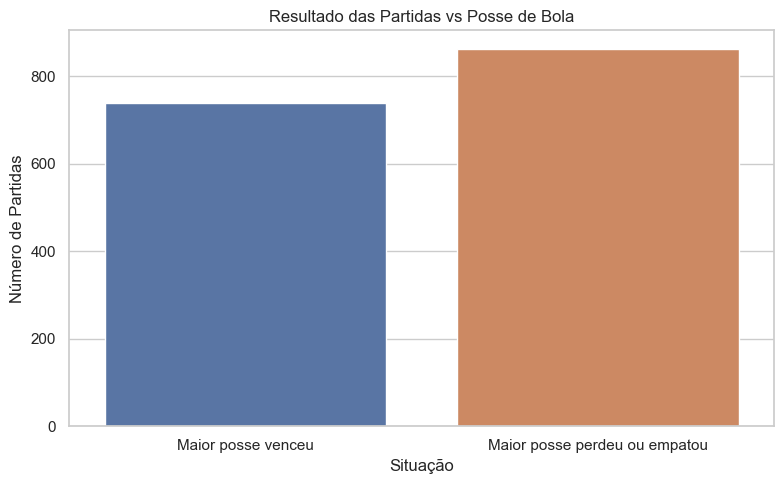

In [55]:
# Plotando um gráfico para melhor entendimento

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(data=posse_win, x='resultado_posse')
plt.title("Resultado das Partidas vs Posse de Bola")
plt.xlabel("Situação")
plt.ylabel("Número de Partidas")
plt.tight_layout()
plt.show()

### Insight: Do total de 1600 partidas, em 46% delas o vencedor tinha a maior posse de bola. O que significa que,  não necesssariamente o time que detém a maior posse de bola tende a vencer a partida.

## A vantagem de jogar em casa (mandante) é real?

In [56]:
# importando o módulo sql
import sqlite3

In [57]:
# criando a conexão
con = sqlite3.connect(":memory:")

In [58]:
# subindo o dataframe para o sqlite

dados_completo.to_sql("partidas", con, index=False, if_exists = "replace")

1600

In [59]:
# Fzendo uma query sql para verificar a quantidade de vittórias por mando de campo

query = """
SELECT 
    CASE
        WHEN vencedor = mandante THEN 'mandante'
        WHEN vencedor = visitante THEN 'visitante'
        ELSE 'empate'
    END AS tipo_vencedor,
    COUNT(*) AS total
FROM partidas
GROUP BY tipo_vencedor
ORDER BY total DESC
"""

resultado = pd.read_sql_query(query, con)
print(resultado)

  tipo_vencedor  total
0      mandante   1048
1     visitante    552


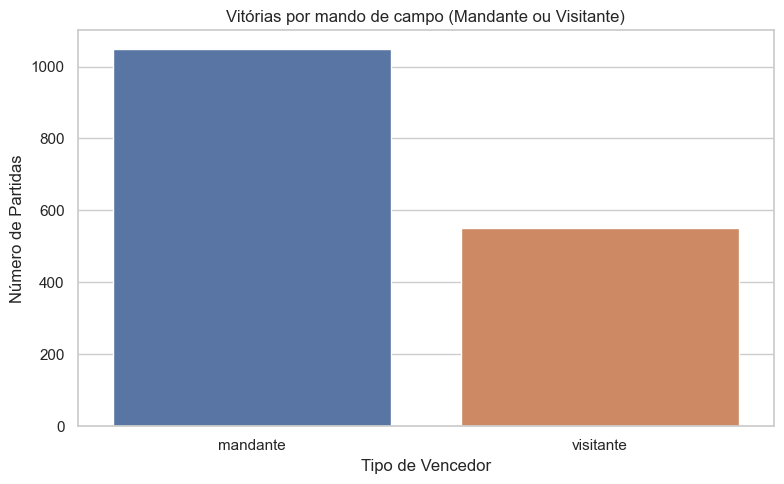

In [60]:
# plotando um gráfico

plt.figure(figsize=(8, 5))
sns.barplot(data=resultado, x='tipo_vencedor', y='total')
plt.title('Vitórias por mando de campo (Mandante ou Visitante)')
plt.xlabel('Tipo de Vencedor')
plt.ylabel('Número de Partidas')
plt.tight_layout()
plt.show()

### Insight: Os times com mando de campo venceram 1,90 vezes mais do que os visitantes. A vantagem de jogar em casa se traduziu em vitória em 65,5% das partidas, de acordo com os dados.

# A estatística dos vencedores

In [61]:
# filtrando o dataframe somente com os vencedores para cada partida

# lista reutilizável
colunas_base = [
    'formacao',
    'chutes',
    'chutes_no_alvo',
    'posse_de_bola',
    'passes',
    'precisao_passes',
    'faltas',
    'cartao_amarelo',
    'cartao_vermelho',
    'impedimentos',
    'escanteios'
]

In [62]:
# função auxiliar para mapear corretamente o nome da coluna no DataFrame original (dados_completo)
def nome_coluna(origem, col):
    if col == 'formacao':
        return f'formacao_{origem}'  # ex: formacao_mandante
    else:
        return f'{origem}_{col}'     # ex: mandante_chutes


In [67]:
vitorias_df = dados_completo[dados_completo['vencedor'].notna()].copy()

for col in colunas_base:
    vitorias_df[col] = np.where(
        vitorias_df['vencedor'] == vitorias_df['mandante'],
        vitorias_df[nome_coluna('mandante', col)],
        vitorias_df[nome_coluna('visitante', col)]
    )

colunas_finais = ['vencedor'] + colunas_base
estatisticas_vencedores = vitorias_df[colunas_finais].copy()

In [68]:
estatisticas_vencedores.head()

,vencedor,formacao,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,Gremio,4-2-3-1,6,2,60%,649,86%,15,1,1,3,4
1,Santos,4-3-3,22,3,54%,532,90%,7,0,0,1,4
2,America-MG,4-1-4-1,14,4,38%,363,76%,11,1,0,4,2
3,Vasco,4-1-4-1,19,7,67%,596,88%,11,4,0,3,9
4,Internacional,4-2-3-1,13,4,45%,412,75%,16,2,0,1,4


In [69]:
# Remove '%' e converte para float
estatisticas_vencedores['posse_de_bola'] = (
    estatisticas_vencedores['posse_de_bola']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
    .replace('', np.nan)
    .astype(float)
)

estatisticas_vencedores['precisao_passes'] = (
    estatisticas_vencedores['precisao_passes']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
    .replace('', np.nan)
    .astype(float)
)

In [70]:
# lista de colunas a serem convertidas
colunas_para_float = [
    'chutes',
    'chutes_no_alvo',
    'passes',
    'faltas',
    'cartao_amarelo',
    'cartao_vermelho',
    'impedimentos',
    'escanteios' 
]

In [71]:
# loop para aplicar a conversão
for col in colunas_para_float:
    estatisticas_vencedores[col] = (
        estatisticas_vencedores[col]
        .astype(str)
        .str.strip()
        .replace('', np.nan)
        .astype(float)
    )

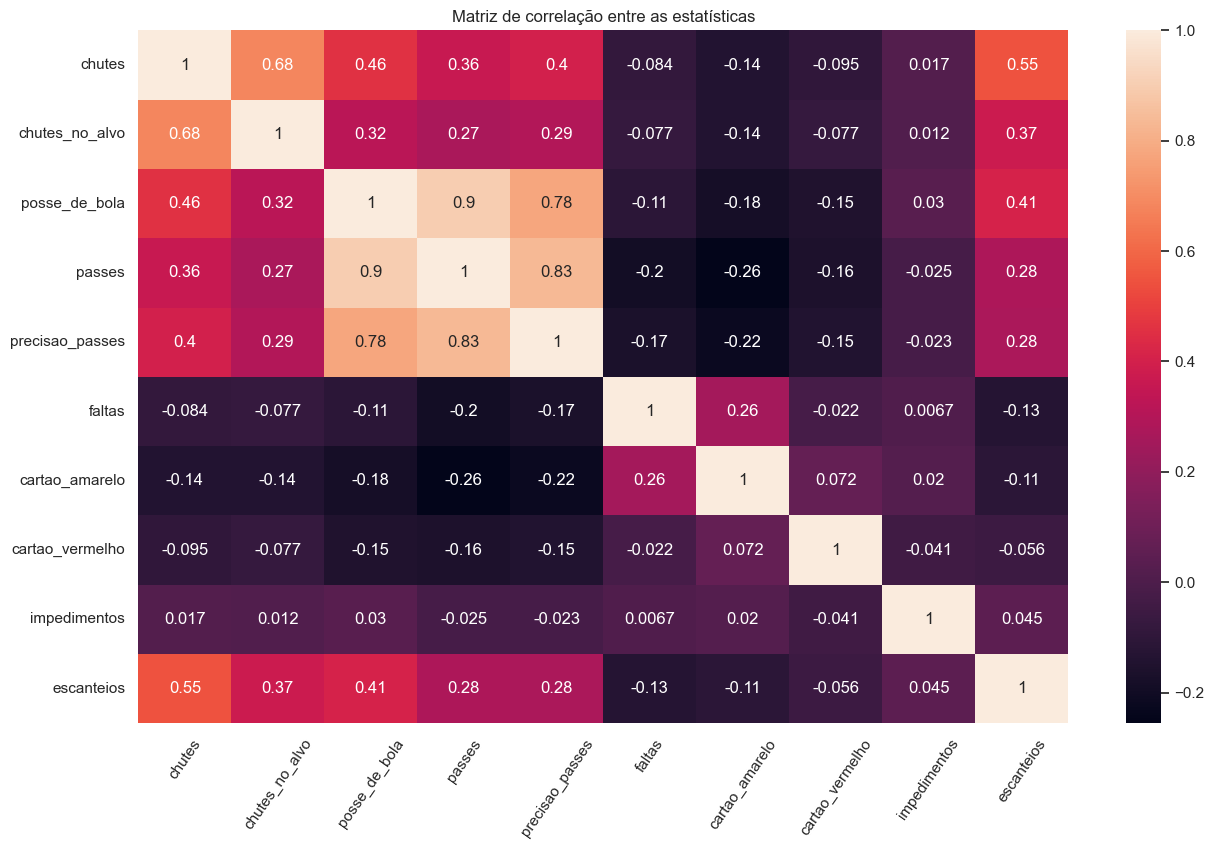

In [72]:
# matriz de correlação para o dataframe somente com os vencedores das partidas
plt.figure(figsize=(15, 9))
sns.heatmap(estatisticas_vencedores.corr(), annot = True)
plt.title('Matriz de correlação entre as estatísticas')
plt.xticks(rotation = 55)
plt.show()

# A  estatisticas dos perdedores

In [79]:
# Adiciona a coluna 'perdedor' (caso ainda não exista)
def identificar_perdedor(row):
    if row['vencedor'] == row['mandante']:
        return row['visitante']
    elif row['vencedor'] == row['visitante']:
        return row['mandante']
    else:
        return None  # empates

dados_completo['perdedor'] = dados_completo.apply(identificar_perdedor, axis=1)

# Filtra apenas partidas com perdedor (sem empates)
derrotas_df = dados_completo[dados_completo['perdedor'].notna()].copy()

# Reutiliza a lista base
colunas_base = [
    'formacao',
    'chutes',
    'chutes_no_alvo',
    'posse_de_bola',
    'passes',
    'precisao_passes',
    'faltas',
    'cartao_amarelo',
    'cartao_vermelho',
    'impedimentos',
    'escanteios'
]

# Função auxiliar para mapear nome da coluna corretamente
def nome_coluna(origem, col):
    if col == 'formacao':
        return f'formacao_{origem}'
    else:
        return f'{origem}_{col}'

# Preenche colunas com as estatísticas do perdedor
for col in colunas_base:
    derrotas_df[col] = np.where(
        derrotas_df['perdedor'] == derrotas_df['mandante'],
        derrotas_df[nome_coluna('mandante', col)],
        derrotas_df[nome_coluna('visitante', col)]
    )

# Seleciona apenas as colunas finais
colunas_finais = ['perdedor'] + colunas_base
estatisticas_perdedores = derrotas_df[colunas_finais].copy()

In [80]:
estatisticas_perdedores.head()

,perdedor,formacao,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,Cruzeiro,4-2-3-1,12,2,40%,425,81%,20,3,0,0,7
1,Ceara,4-1-4-1,10,2,46%,472,85%,5,1,0,0,2
2,Sport,4-3-2-1,15,5,62%,580,85%,12,3,0,3,6
3,Atletico-MG,4-1-4-1,11,6,33%,321,78%,18,3,0,3,3
4,Bahia,4-2-3-1,12,2,55%,491,82%,18,0,0,1,3


In [81]:
# Remove '%' e converte para float
estatisticas_perdedores['posse_de_bola'] = (
    estatisticas_vencedores['posse_de_bola']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
    .replace('', np.nan)
    .astype(float)
)

estatisticas_perdedores['precisao_passes'] = (
    estatisticas_vencedores['precisao_passes']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
    .replace('', np.nan)
    .astype(float)
)

In [82]:
# lista de colunas a serem convertidas
colunas2_para_float = [
    'chutes',
    'chutes_no_alvo',
    'passes',
    'faltas',
    'cartao_amarelo',
    'cartao_vermelho',
    'impedimentos',
    'escanteios' 
]

In [83]:
# loop para aplicar a conversão
for col in colunas2_para_float:
    estatisticas_vencedores[col] = (
        estatisticas_vencedores[col]
        .astype(str)
        .str.strip()
        .replace('', np.nan)
        .astype(float)
    )

In [84]:
estatisticas_perdedores.head()

,perdedor,formacao,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,Cruzeiro,4-2-3-1,12,2,60.0,425,86.0,20,3,0,0,7
1,Ceara,4-1-4-1,10,2,54.0,472,90.0,5,1,0,0,2
2,Sport,4-3-2-1,15,5,38.0,580,76.0,12,3,0,3,6
3,Atletico-MG,4-1-4-1,11,6,67.0,321,88.0,18,3,0,3,3
4,Bahia,4-2-3-1,12,2,45.0,491,75.0,18,0,0,1,3


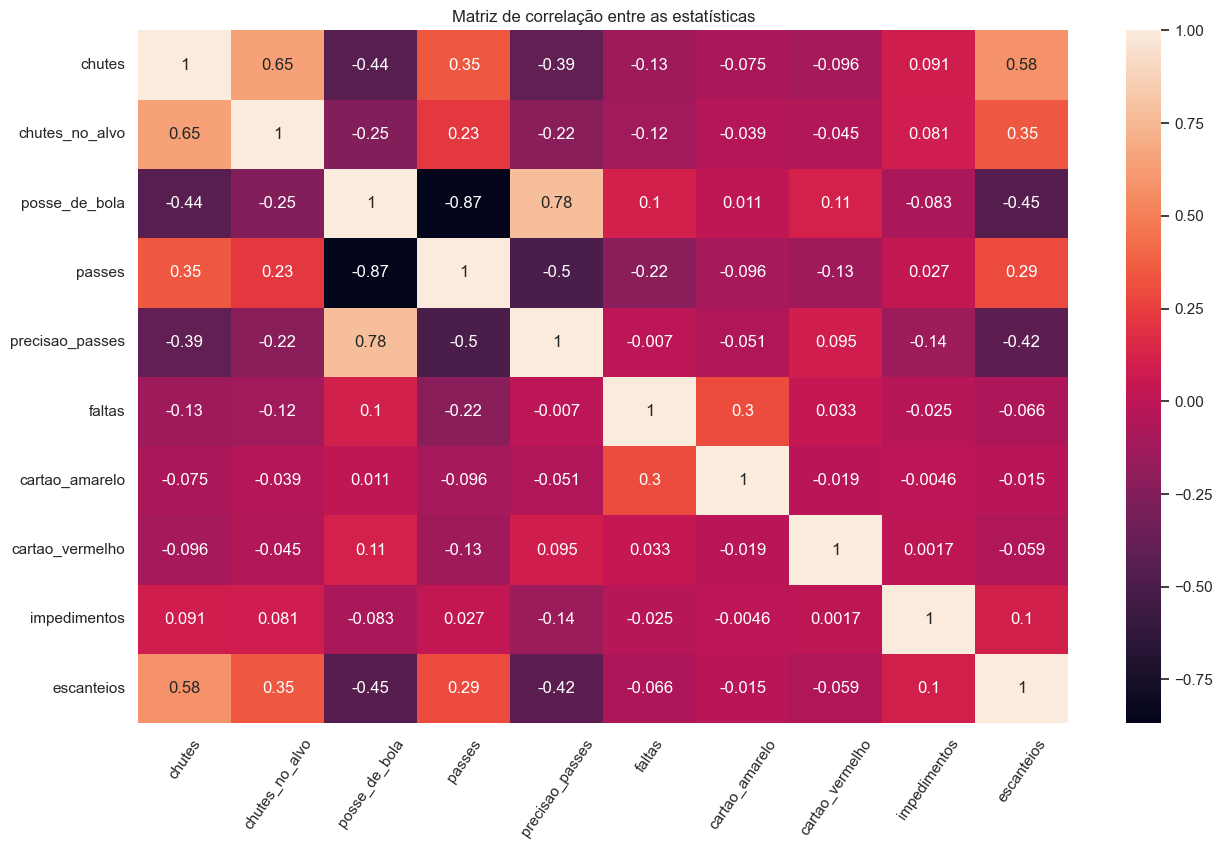

In [91]:
# matriz de correlação para o dataframe somente com os perdedores das partidas
plt.figure(figsize=(15, 9))
sns.heatmap(estatisticas_perdedores.corr(), annot = True)
plt.title('Matriz de correlação entre as estatísticas')
plt.xticks(rotation = 55)
plt.show()

### Comparação das correlações

### A matriz de correlação não indica causalidade, porém, pode nos revelar percepções interessantes.

#### Como funciona: A correlaçao de Pearson varia entre -1 e 1, sendo que:

#### Se = 1: Correlação perfeita
#### Se = 0: Sem correlação linear
#### Se = -1: Correlação negativa perfeita

#### Ou seja, Um coeficiente de correlação igual a 1 indica uma correlação linear perfeita positiva, ou seja, quando uma variável aumenta, a outra variável também aumenta na mesma proporção.

#### Um coeficiente de correlação igual a -1 indica uma correlação linear perfeita negativa, ou seja, quando uma variável aumenta, a outra variável diminui na mesma proporção.

#### Um coeficiente de correlação igual a 0 sugere que não há correlação linear entre as duas variáveis.

### Insights:

### 1: A forte corelação positiva (0,9) entre passes e posse de bola e passes e precisão de passes (0,83) nos times vencedores sugere que esses times possuem alta assertividade numa troca de passes dinâmica.

### 2: Os times vencedores possuem correlação linear positiva entre as variáveis posse de bola e chutes (0,46) o que pode sugerir que arriscam mais em comparação com os times perdedores cuja correlação é -0,25.

### 3: A correlação em variáveis improdutivas (faltas, cartões, impedimentos) é sempre menor nos times vencedores.

#### Para confirmar essas hipóteses seria necessário uma análise de causalidade, embora a correlção, nesse contexto,  pode ajudar a entender comportamentos intrínsecos e padrões de ambos os grupos (vencedores e perdedores) o que pode ser útil para formular estratégias. 

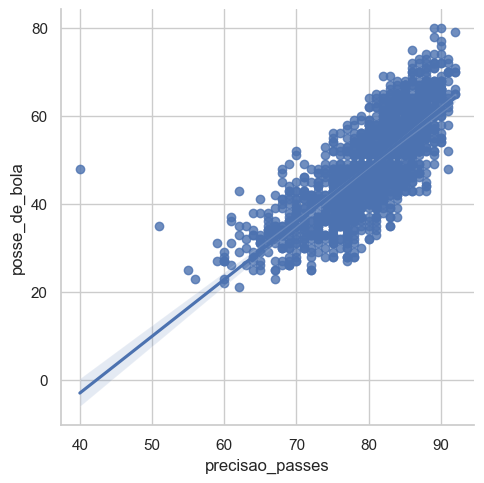

In [99]:
# demonstração gráfica de correlação
sns.lmplot(data = estatisticas_vencedores, x='precisao_passes', y = 'posse_de_bola')
plt.show()

# Fim

## Obrigado!